In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import datetime

In [3]:
import re

In [4]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [5]:
# Seteos de Pandas para ver mejor la info. https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
# In max_columns and max_rows ‘None’ value means unlimited.
pd.set_option('display.max_rows', 100)
# Conviene setear min_rows también porque cuando se superan las max_rows, sólo muestra la cantidad indicada en min_rows.
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 100
pd.options.display.float_format = '{:.1f}'.format

In [90]:
# Natural Languaje whit Python: https://machinelearningmastery.com/clean-text-machine-learning-python/
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# PunktSentenceTokenizer es un segmentador sencillo que básicamente segmenta por puntos. sent_tokenizer(), 
# es una instancia especial del PunktSenteceTokenizer que ha sido entrenada y que funciona bien para varias lenguas europeas. 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import string

from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\COLMO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\COLMO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\COLMO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [91]:
# segmentador para una lengua determinada (probar para ver si toma los . al final de una palabra como abreviatura "Sr.")
#import nltk.data
parrafo="Hoy el Sr. Smith y la Sra. Johanson se encontrarán en St. Fe y Corrientes."
segmentador=nltk.data.load('nltk:tokenizers/punkt/spanish.pickle')
segmentos=segmentador.tokenize(parrafo)
print(segmentos)

['Hoy el Sr. Smith y la Sra.', 'Johanson se encontrarán en St.', 'Fe y Corrientes.']


In [105]:
#En los ficheros adjuntos podéis encontrar una lista de abreviaciones. 
#Ahora lo que haremos será cargar el spanish.pickle que hemos entrenado y modificarlo añadiendo la lista de abreviaturas 
#y acrónimos del fichero. Grabaremos este nuevo segmentador como spanish-mod.pickle. (programa-4-14.py)
import nltk.data
import codecs
import pickle
segmentador=nltk.data.load('nltk:tokenizers/punkt/spanish.pickle')
archivo_abreviaturas=codecs.open("abr-spa.txt","r", encoding="utf-8")
abreviaturas_extra =[]
for abreviatura in archivo_abreviaturas.readlines():
    abreviatura=abreviatura.rstrip()
    abreviaturas_extra.append(abreviatura)
segmentador._params.abbrev_types.update(abreviaturas_extra)
out = open("spanish-mod.pickle","wb")
pickle.dump(segmentador, out)
out.close()

In [107]:
parrafo="Hoy el Sr. Smith y la Sra. Johanson se encontrarán en St. Fe y Corrientes."
parrafo='Dato Migrado - K01 8:30 Hs.a 12:00 Hs. En Mtto preventivo se realiza cambio de aceite y bujias.-'
segmentador=nltk.data.load('spanish-mod.pickle')
#abreviaturas_extra = ['St']
#segmentador._params.abbrev_types.update(abreviaturas_extra)
segmentos=segmentador.tokenize(parrafo.lower())
print(segmentos)

['dato migrado - k01 8:30 hs.a 12:00 hs.', 'en mtto preventivo se realiza cambio de aceite y bujias.-']


In [ ]:
#https://xwiki.recursos.uoc.edu/wiki/matm21564es/view/test/
# Si no indicamos nada en el momento de llamar a PlaintextCorpusReader utiliza:
#Tokenitzador: word_tokenizer=WordPunctTokenizer(),
#Segmentador: sent_tokenizer=nltk.data.LazyLoader('tokenizers/punkt/english.pickle') 
#Es decir, asume por defecto que la lengua del corpus es el inglés.

In [6]:
path_data = 'C:\\Users\\COLMO\\OneDrive\\0-Data Science\\data_science\\data_pampa'
#path_data = 'C:\\Users\\Usuario\\OneDrive\\0-Data Science\\data_science\\data_pampa'
#path_data = 'C:\\Users\\COLMO\\data_mining\\data_pampa'

In [28]:
file = 'EMA_compresores_diario_ok.csv'
df_diario = pd.read_csv(path_data + '\\' + file, sep=';', encoding='UTF-8', decimal = '.')
df_diario.drop(columns='Unnamed: 0', inplace=True)
df_diario.timestamp = pd.to_datetime(df_diario.timestamp, format='%Y-%m-%d') # %H:%M:%S')
equipment_id = [25, 26, 27, 108, 109, 110, 111, 115, 116]
df_diario = df_diario[df_diario.equipment_id.isin(equipment_id)]
df_diario.reset_index(drop=True, inplace=True)
print(df_diario.shape)
print(df_diario.dtypes)
print(100*df_diario.isna().sum()/len(df_diario))
df_diario.tail()

(22007, 15)
equipment_id             int64
element                 object
timestamp       datetime64[ns]
estado                  object
comments                object
mant_prog              float64
mant_no_prog           float64
en_reserva             float64
en_marcha              float64
rpm                    float64
press_succ             float64
press_desc             float64
temp_succ              float64
temp_desc              float64
caudal                 float64
dtype: object
equipment_id     0.0
element          0.0
timestamp        0.0
estado          16.9
comments         0.0
mant_prog       41.7
mant_no_prog    41.4
en_reserva      41.8
en_marcha       41.8
rpm             19.7
press_succ      19.7
press_desc      19.7
temp_succ        2.0
temp_desc        2.0
caudal         100.0
dtype: float64


,equipment_id,element,timestamp,estado,comments,mant_prog,mant_no_prog,en_reserva,en_marcha,rpm,press_succ,press_desc,temp_succ,temp_desc,caudal
22002,116,K-09,2022-02-18,En Reserva,02:40hs Queda E/R.,0.0,0.0,3.5,20.5,0.0,0.0,0.0,0.0,0.0,NaN
22003,116,K-09,2022-02-19,En Reserva,Sin Novedades,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
22004,116,K-09,2022-02-20,En Reserva,Sin Novedades,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
22005,116,K-09,2022-02-21,En Funcionamiento,10:45 hs Se deja E/S nuevamente.-,0.0,0.0,5.0,19.0,1055.0,6.4,35.8,15.9,107.9,NaN
22006,116,K-09,2022-02-22,En Funcionamiento,Sin Novedades,0.0,0.0,0.0,24.0,1055.0,7.0,35.9,18.8,109.7,NaN


In [31]:
# HAY 6876 REGISTROS QUE NO TIENEN DATOS DE HORAS Y NO TIENEN COMENTARIOS Hasta el 2019-05-13
# --> se podrían eliminar para el estudio o recortar el estudio a partir del 14/5/2019
# Los registros que quedan, se reemplaza NaN por 0. Igualmente, pueden no tener horas desagregadas. Pero tienen comentarios.
# Se puede intentar hacer algo entre los 2.
df_copy = df_diario[['element', 'timestamp', 'comments', 'mant_prog', 'mant_no_prog', 'en_reserva', 'en_marcha']].copy()
df_sin_datos = df_copy[(df_copy.mant_prog.isna()) & (df_copy.mant_no_prog.isna()) 
                & (df_copy.en_reserva.isna()) & (df_copy.en_marcha.isna())
                & ((df_copy.comments=='Sin Novedades') | (df_copy.comments=='Dato Migrado -'))]
df_copy = df_copy[~df_copy.index.isin(df_sin_datos.index.to_list())]
print('Registros con datos Horarios (en horas o comentarios no nulos):', df_copy.shape, '----> NaN se reemplaza x 0.')
# Qué pasa si reemplazo los NaN por 0?
df_copy.mant_prog.fillna(0, inplace=True)
df_copy.mant_no_prog.fillna(0, inplace=True)
df_copy.en_reserva.fillna(0, inplace=True)
df_copy.en_marcha.fillna(0, inplace=True)
df_copy['total'] = df_copy.mant_prog + df_copy.mant_no_prog + df_copy.en_reserva + df_copy.en_marcha
# % Nulos --> los registros que quedan tienen NaN
print(100*df_copy.isna().sum()/len(df_copy))
print('Registros con horas total < 24:', df_copy[df_copy.total<24].shape)

Registros con datos Horarios (en horas o comentarios no nulos): (14338, 7) ----> NaN se reemplaza x 0.
element        0.0
timestamp      0.0
comments       0.0
mant_prog      0.0
mant_no_prog   0.0
en_reserva     0.0
en_marcha      0.0
total          0.0
dtype: float64
Registros con horas total < 24: (1523, 8)


In [47]:
print('Registros con datos Horarios (en horas o comentarios no nulos):', df_copy.shape)
df_mp = df_copy[(df_copy.mant_prog>0) & (df_copy.mant_no_prog==0)]
print('Registros sólo con Mant Prog:', df_mp.shape)
df_mnp = df_copy[(df_copy.mant_prog==0) & (df_copy.mant_no_prog>0)]
print('Registros sólo con Mant NO Prog:', df_mnp.shape)
df_2 = df_copy[(df_copy.mant_prog>0) & (df_copy.mant_no_prog>0)]
print('Registros sólo con ambos mantenimientos:', df_2.shape)
df_sin_horas = df_copy[(df_copy.total==0)]
print('Registros Analizar Comments:', df_sin_horas.shape)
print('Subtotal:', df_mp.shape[0]+df_mnp.shape[0]+df_2.shape[0]+df_sin_horas.shape[0])
df_sin_mant = df_copy[(df_copy.mant_prog==0) & (df_copy.mant_no_prog==0) & (df_copy.total>0)]
print('Registros Sin Mantenimiento:', df_sin_mant.shape)
print('Total:', df_mp.shape[0]+df_mnp.shape[0]+df_2.shape[0]+df_sin_horas.shape[0]+df_sin_mant.shape[0])

Registros con datos Horarios (en horas o comentarios no nulos): (14338, 8)
Registros sólo con Mant Prog: (482, 8)
Registros sólo con Mant NO Prog: (1741, 8)
Registros sólo con ambos mantenimientos: (106, 8)
Registros Analizar Comments: (1420, 8)
Subtotal: 3749
Registros Sin Mantenimiento: (10589, 8)
Total: 14338


In [48]:
# Los registros con horas únicamente en mant prog xor mant no prog se pueden LABELEAR directamente:
df_mp['mp'] = 1
df_mp['mnp'] = 0
df_mnp['mp'] = 0
df_mnp['mnp'] = 1

In [50]:
df_labeled = pd.concat([df_mp, df_mnp], ignore_index=True)
df_labeled.head()

,element,timestamp,comments,mant_prog,mant_no_prog,en_reserva,en_marcha,total,mp,mnp
0,K-01,2013-09-26,Dato Migrado -,0.2,0.0,0.0,23.8,24.0,1,0
1,K-01,2013-10-22,Dato Migrado - K01 8:30 Hs.a 12:00 Hs. En Mtto preventivo se realiza cambio de aceite y bujias.-,3.5,0.0,0.0,20.5,24.0,1,0
2,K-01,2013-11-19,"Dato Migrado - De 08:45 a 12:10 Hs Personal de Ing y mant, realiza Dynaprove",3.2,0.0,0.1,20.7,24.0,1,0
3,K-01,2013-11-26,Dato Migrado - K - 01,24.0,0.0,0.0,0.0,24.0,1,0
4,K-01,2013-11-27,Dato Migrado - K - 01,24.0,0.0,0.0,0.0,24.0,1,0


## Text Pre-Processing
* Simple text cleaning processes: Some of the common text cleaning process involves:
    * Removing punctuations, special characters, URLs & hashtags
    * Removing leading, trailing & extra white spaces/tabs
    * Typos, slangs are corrected, abbreviations are written in their long forms
* Stop-word removal: We can remove a list of generic stop words from the English vocabulary using nltk. A few such words are ‘i’,’you’,’a’,’the’,’he’,’which’ etc.
* Stemming: Refers to the process of slicing the end or the beginning of words with the intention of removing affixes(prefix/suffix)
* Lemmatization: It is the process of reducing the word to its base form<br>
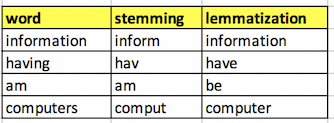

In [59]:
string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
punct = string.punctuation

In [63]:
df_labeled[df_labeled.comments!='Dato Migrado -'].index

Int64Index([   1,    2,    3,    4,    6,    7,    8,    9,   10,   11,
            ...
            2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222], dtype='int64', length=2002)

In [65]:
mant_prog = ['mpr', 'programado', 'preventivo']
mant_no_prog = ['paro', 'correctivo', 'falla', 'mnp', 'f/s']

In [75]:
iloc = 2
text = df_labeled.loc[iloc].comments
print(text)
text = preprocess(text)
print(text)
text = stopword(text)
print(text)
word_pos_tags = nltk.pos_tag(word_tokenize(text))
word_pos_tags

Dato Migrado - De 08:45 a 12:10 Hs Personal de Ing y mant, realiza Dynaprove
dato migrado de a hs personal de ing y mant realiza dynaprove
dato migrado hs personal ing mant realiza dynaprove


[('dato', 'NN'),
 ('migrado', 'NN'),
 ('hs', 'VBD'),
 ('personal', 'JJ'),
 ('ing', 'NN'),
 ('mant', 'JJ'),
 ('realiza', 'NN'),
 ('dynaprove', 'NN')]

In [51]:
def preprocess(text):
    text = text.lower() 
    text = text.strip()  
    text = re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

In [68]:
# STOPWORD REMOVAL
def stopword(text):
    a = [i for i in text.split() if i not in stopwords.words('spanish')]
    return ' '.join(a)

In [110]:
# Stemming: Refers to the process of slicing the end or the beginning of words with the intention of removing (prefix/suffix)
from nltk.stem import SnowballStemmer

#from nltk.stem import WordNetLemmatizer
## Initialize the lemmatizer
#wl = WordNetLemmatizer()

#from nltk.corpus import wordnet

dato migrado hs personal ing mant realiza dynaprove


'dato migrado hs personal ing mant realiza dynaprov'

In [116]:
iloc = 6
text = df_labeled.loc[iloc].comments
spanish_stemmer = SnowballStemmer('spanish')
print(text)
spanish_stemmer.stem(text)

Dato Migrado - K01 de 09:00 A 12:00 Hs. En mtto progrmado por cambio de aceite.- se deja en servicio nuevamente.-


'dato migrado - k01 de 09:00 a 12:00 hs. en mtto progrmado por cambio de aceite.- se deja en servicio nuevamente.-'

In [ ]:
#### NO ENCONTRÉ COMO TAGGEAR EN ESPAÑOL con NLTK --> pruebo Spacy (ver abajo)
#LEMMATIZATION: Lemmatization is the process of reducing the word to its base form
# This is a helper function to map NTLK position tags
# part-of-speech tagging is the second step in the typical NLP pipeline, following tokenization.
# "and" is CC, a coordinating conjunction; "now" and "completely" are RB, or adverbs; for is IN, a preposition; 
# "something" is NN, a noun; and "different" is JJ, an adjective.
# tagging in spanish: https://stackoverflow.com/questions/14732465/nltk-tagging-spanish-words-using-a-corpus
# https://colab.research.google.com/github/vitojph/kschool-nlp-18/blob/master/notebooks/nltk-pos.ipynb#scrollTo=lDe8oDmwnSxN
# Mejor: https://notebook.community/vitojph/kschool-nlp/notebooks-py3/pos-tagger-es
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
# Tokenize the sentence
def lemmatizer(text):
    word_pos_tags = nltk.pos_tag(word_tokenize(text)) # Get position tags
    a = [wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [80]:
#nltk.download('universal_tagset')
#nltk.download('cess_esp')
from nltk.corpus import cess_esp

# NLTK: CESS_ESP, un treebank anotado a partir de una colección de noticias en español.
# TreeBank (denominado también como Corpus parseado o más ampliamente Penn Treebank) es un corpus lingüístico en el que cada frase ha sido parseada, es decir anotada con su estructura sintáctica. La estructura sintáctica se ha representado generalmente como una estructura arbórea que recibe la denominación de TreeBank.
cess_esp = cess_esp.tagged_sents()
print(cess_esp[5])

#cess_esp._tagset = "es-ancora"
#oraciones = cess_esp.tagged_sents(tagset="universal")
#print(oraciones[0])



[('EDF', 'np00000'), ('tiene', 'vmip3s0'), ('previsto', 'aq0msp'), ('invertir', 'vmn0000'), ('194', 'Z'), ('millones', 'ncmp000'), ('de', 'sps00'), ('euros', 'Zm'), ('-Fpa-', 'Fpa'), ('186', 'Z'), ('millones', 'ncmp000'), ('de', 'sps00'), ('dólares', 'Zm'), ('-Fpt-', 'Fpt'), ('en', 'sps00'), ('la', 'da0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('Río_Bravo', 'np00000'), (',', 'Fc'), ('con', 'sps00'), ('una', 'di0fs0'), ('potencia', 'ncfs000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), (',', 'Fc'), ('y', 'cc'), ('134', 'Z'), ('millones', 'ncmp000'), ('de', 'sps00'), ('euros', 'Zm'), ('-Fpa-', 'Fpa'), ('28', 'Z'), ('millones', 'ncmp000'), ('de', 'sps00'), ('dólares', 'Zm'), ('-Fpt-', 'Fpt'), ('en', 'sps00'), ('Saltillo', 'np00000'), (',', 'Fc'), ('que', 'pr0cn000'), ('como', 'cs'), ('la', 'da0fs0'), ('primera', 'ao0fs0'), ('funcionará', 'vmif3s0'), ('con', 'sps00'), ('gas', 'ncms000'), ('natural', 'aq0cs0'), ('y', 'cc'), ('cuya', 'pr0fs000'), ('potencia', 'ncfs000'),

In [117]:
import spacy